# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 6
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [5]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(30000, 32, 32, 3)
(30000, 6)
(6000, 32, 32, 3)
(6000, 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


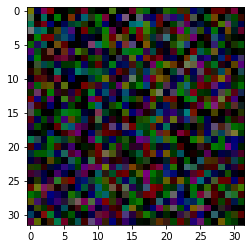

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

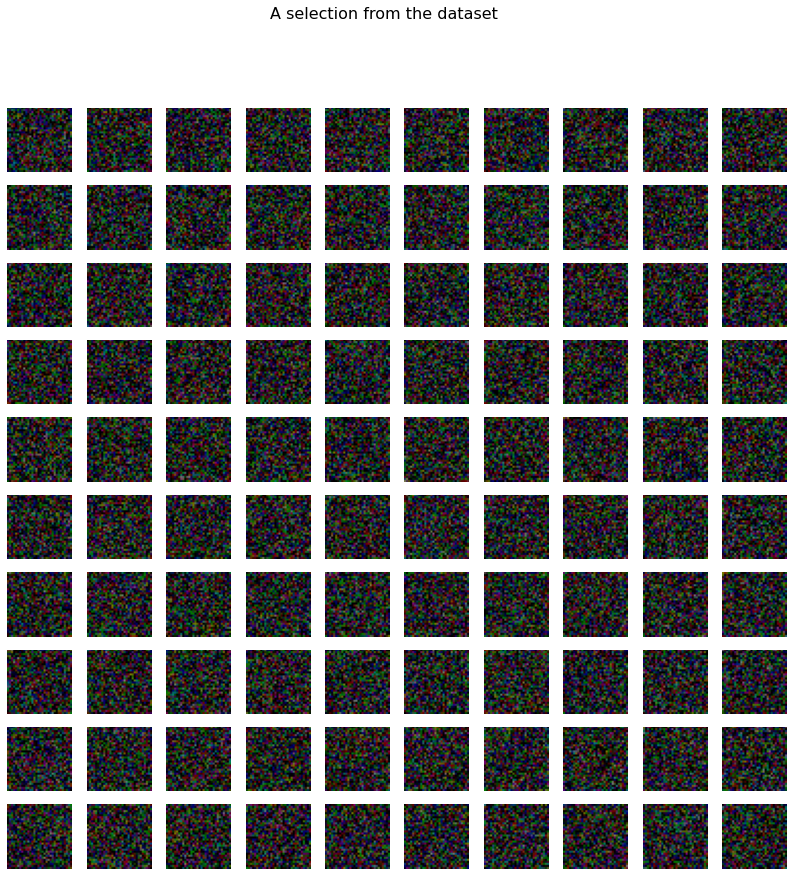

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 12s 44ms/step - loss: 1.7927 - accuracy: 0.1643
test loss, test acc: [1.792698860168457, 0.16433332860469818]
Evaluate on test data
12/12 [==============================] - 1s 115ms/step - loss: 1.7927 - accuracy: 0.1695
test loss, test acc: [1.792742133140564, 0.16949999332427979]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 12s 32ms/step - loss: 1.7930 - accuracy: 0.1626 - val_loss: 1.7922 - val_accuracy: 0.1667
Epoch 2/250
300/300 [==============================] - 10s 32ms/step - loss: 1.7921 - accuracy: 0.1689 - val_loss: 1.7921 - val_accuracy: 0.1670
Epoch 3/250
300/300 [==============================] - 9s 32ms/step - loss: 1.7919 - accuracy: 0.1648 - val_loss: 1.7923 - val_accuracy: 0.1665
Epoch 4/250
300/300 [==============================] - 9s 32ms/step - loss: 1.7916 - accuracy: 0.1727 - val_loss: 1.7920 - val_accuracy: 0.1690
Epoch 5/250
300/300 [==============================] - 10s 32ms/step - loss: 1.7914 - accuracy: 0.1711 - val_loss: 1.7924 - val_accuracy: 0.1668
Epoch 6/250
300/300 [==============================] - 9s 32ms/step - loss: 1.7911 - accuracy: 0.1783 - val_loss: 1.7922 - val_accuracy: 0.1697
Epoch 7/250
300/300 [==============================] - 9s 32ms/step - loss: 1.7910 - accuracy: 0.1755 - val_loss: 1.7921 - val_accura

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 2s 30ms/step - loss: 9.3035e-07 - accuracy: 1.0000
test loss, test acc: [9.303490742240683e-07, 1.0]
Evaluate on test data
12/12 [==============================] - 0s 30ms/step - loss: 11.8620 - accuracy: 0.1665
test loss, test acc: [11.862020492553711, 0.1665000021457672]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 1s 8ms/step - loss: 15.8668 - accuracy: 0.1641
test loss, test acc: [15.866805076599121, 0.16410000622272491]
Evaluate on test data
12/12 [==============================] - 0s 16ms/step - loss: 15.7938 - accuracy: 0.1680
test loss, test acc: [15.793776512145996, 0.1679999977350235]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 4s 9ms/step - loss: 4.0176 - accuracy: 0.1672 - val_loss: 1.7917 - val_accuracy: 0.1667
Epoch 2/250
300/300 [==============================] - 2s 8ms/step - loss: 1.8016 - accuracy: 0.1649 - val_loss: 1.7920 - val_accuracy: 0.1662
Epoch 3/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7977 - accuracy: 0.1663 - val_loss: 1.7918 - val_accuracy: 0.1673
Epoch 4/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7956 - accuracy: 0.1671 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7956 - accuracy: 0.1672 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7958 - accuracy: 0.1647 - val_loss: 1.7918 - val_accuracy: 0.1660
Epoch 7/250
300/300 [==============================] - 2s 8ms/step - loss: 1.7942 - accuracy: 0.1653 - val_loss: 1.7917 - val_accuracy: 0.1683

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 0s 7ms/step - loss: 1.4220 - accuracy: 0.5985
test loss, test acc: [1.421995759010315, 0.598466694355011]
Evaluate on test data
12/12 [==============================] - 0s 7ms/step - loss: 1.8554 - accuracy: 0.1620
test loss, test acc: [1.8554376363754272, 0.16200000047683716]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 4s 47ms/step - loss: 2.5405 - accuracy: 0.1670
test loss, test acc: [2.540473699569702, 0.16696666181087494]
Evaluate on test data
12/12 [==============================] - 1s 86ms/step - loss: 2.5481 - accuracy: 0.1647
test loss, test acc: [2.5481154918670654, 0.16466666758060455]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 15s 42ms/step - loss: 2.0929 - accuracy: 0.1644 - val_loss: 1.8804 - val_accuracy: 0.1683
Epoch 2/250
300/300 [==============================] - 13s 42ms/step - loss: 1.7580 - accuracy: 0.2457 - val_loss: 1.8445 - val_accuracy: 0.1663
Epoch 3/250
300/300 [==============================] - 13s 42ms/step - loss: 1.5647 - accuracy: 0.3700 - val_loss: 1.8837 - val_accuracy: 0.1602
Epoch 4/250
300/300 [==============================] - 12s 40ms/step - loss: 1.3706 - accuracy: 0.4811 - val_loss: 1.9512 - val_accuracy: 0.1687
Epoch 5/250
300/300 [==============================] - 12s 40ms/step - loss: 1.1573 - accuracy: 0.5812 - val_loss: 2.0831 - val_accuracy: 0.1648
Epoch 6/250
300/300 [==============================] - 12s 40ms/step - loss: 0.9531 - accuracy: 0.6625 - val_loss: 2.2478 - val_accuracy: 0.1690
Epoch 7/250
300/300 [==============================] - 12s 40ms/step - loss: 0.7589 - accuracy: 0.7417 - val_loss: 2.4746 - val_ac

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 2s 40ms/step - loss: 0.0027 - accuracy: 0.9996
test loss, test acc: [0.0027385856956243515, 0.9995666742324829]
Evaluate on test data
12/12 [==============================] - 1s 40ms/step - loss: 6.1976 - accuracy: 0.1677
test loss, test acc: [6.197568893432617, 0.16766667366027832]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 7s 68ms/step - loss: 2.5470 - accuracy: 0.1667
test loss, test acc: [2.5470354557037354, 0.1666666716337204]
Evaluate on test data
12/12 [==============================] - 2s 182ms/step - loss: 2.5465 - accuracy: 0.1667
test loss, test acc: [2.5464916229248047, 0.1666666716337204]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 14s 41ms/step - loss: 1.8108 - accuracy: 0.1684 - val_loss: 1.7926 - val_accuracy: 0.1640
Epoch 2/250
300/300 [==============================] - 12s 40ms/step - loss: 1.7920 - accuracy: 0.1632 - val_loss: 1.7918 - val_accuracy: 0.1683
Epoch 3/250
300/300 [==============================] - 13s 42ms/step - loss: 1.7919 - accuracy: 0.1644 - val_loss: 1.7917 - val_accuracy: 0.1685
Epoch 4/250
300/300 [==============================] - 12s 40ms/step - loss: 1.7918 - accuracy: 0.1650 - val_loss: 1.7917 - val_accuracy: 0.1667
Epoch 5/250
300/300 [==============================] - 13s 42ms/step - loss: 1.7919 - accuracy: 0.1627 - val_loss: 1.7917 - val_accuracy: 0.1670
Epoch 6/250
300/300 [==============================] - 13s 42ms/step - loss: 1.7919 - accuracy: 0.1624 - val_loss: 1.7918 - val_accuracy: 0.1665
Epoch 7/250
300/300 [==============================] - 12s 40ms/step - loss: 1.7919 - accuracy: 0.1666 - val_loss: 1.7917 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 3s 47ms/step - loss: 1.7918 - accuracy: 0.1667
test loss, test acc: [1.7917592525482178, 0.16670000553131104]
Evaluate on test data
12/12 [==============================] - 1s 47ms/step - loss: 1.7918 - accuracy: 0.1667
test loss, test acc: [1.7917600870132446, 0.1666666716337204]


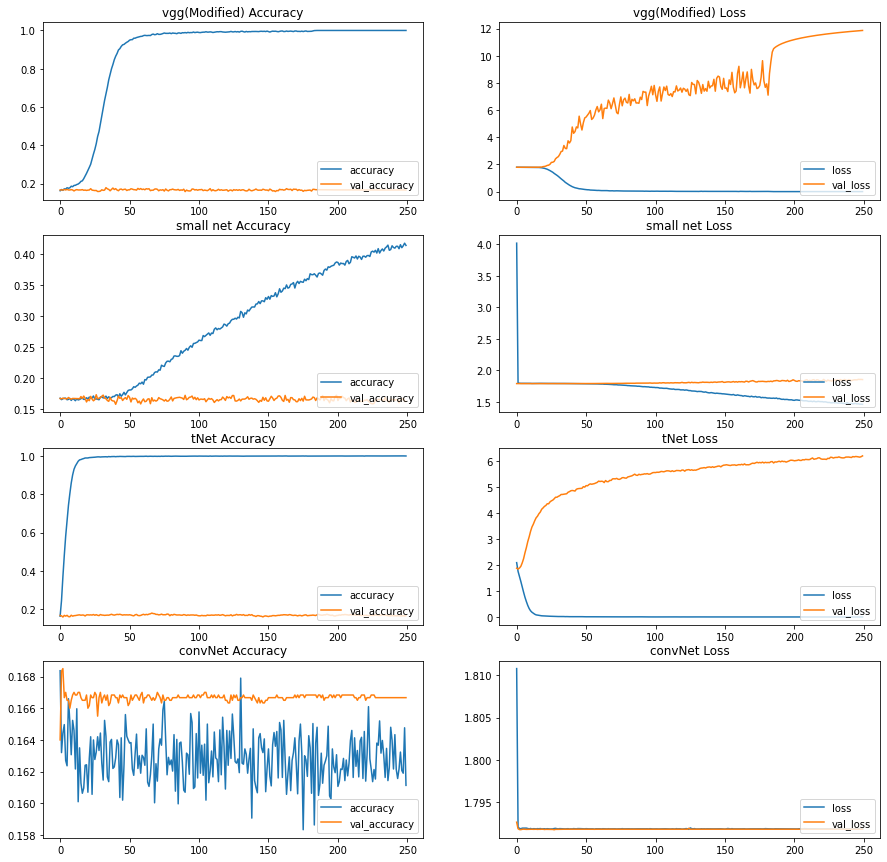

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
